In [1]:
text = ['This is a line',
        'This is another line',
        'Completely different line']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [3]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |
 |  Convert a collection of text documents to a matrix of token counts.
 |
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_auto_examp

In [15]:
cv = CountVectorizer()

In [16]:
sparse_matrix=cv.fit_transform(text)

In [17]:
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [18]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [19]:
tfidf = TfidfTransformer()

In [20]:
sparse_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 6)>

In [21]:
results=tfidf.fit_transform(sparse_matrix)

In [22]:
results

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (3, 6)>

In [23]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tv = TfidfVectorizer()

In [26]:
tv_results = tv.fit_transform(text)

In [27]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [30]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<Axes: xlabel='airline_sentiment', ylabel='count'>

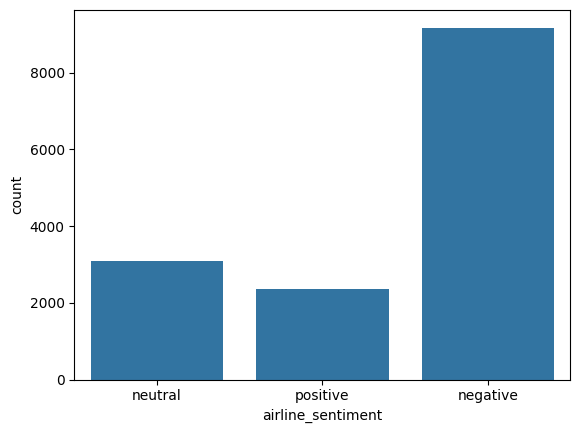

In [32]:
sns.countplot(data=df,x='airline_sentiment')

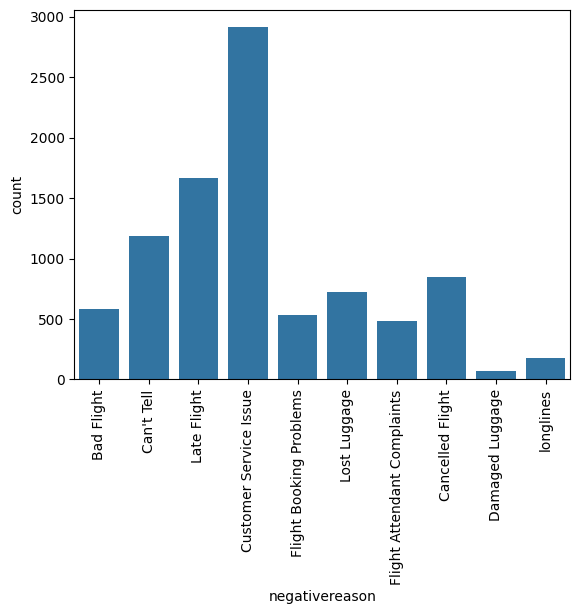

In [34]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

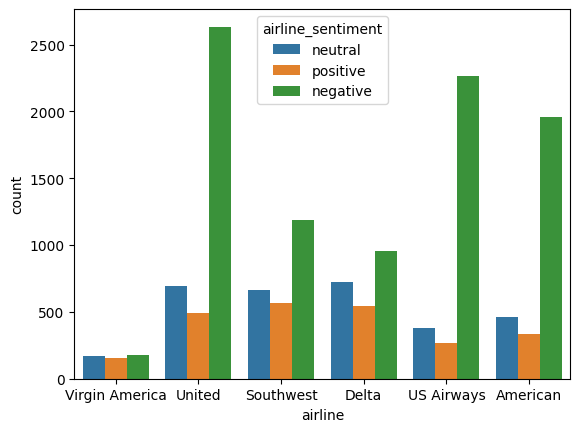

In [35]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

In [36]:
data = df[['airline_sentiment','text']]

In [37]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [38]:
X = data['airline_sentiment']

In [39]:
y = data['text']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf = TfidfVectorizer(stop_words='english')

In [44]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [45]:
X_train_tfidf = tfidf.transform(X_train)

In [46]:
X_test_tfidf = tfidf.transform(X_test)

In [47]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11712 stored elements and shape (11712, 3)>

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [55]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [56]:
from sklearn.svm import SVC, LinearSVC

In [57]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf,y_train)

SVC()

In [58]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [60]:
from sklearn.metrics import classification_report

In [63]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))

In [65]:
report(nb);

                                                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                 #Real RT @JetBlue: Our fleet's on fleek. http://t.co/ERzht75kqZ       0.00      0.00      0.00         1
                                    #nothelpful MT @AmericanAir: Our call volume is extremely high today. Our apologies. Please continue contacting Reservations for assistance.       0.00      0.00      0.00         1
                                                                                                     ..... Can you not? “@JetBlue: Our fleet's on fleek. http://t.co/udPq0flIQo”       0.00      0.00      0.00         1
                                     .@AmericanAir @Kaha58 Would be nice if you could actually talk to the reserv. team...it ju

C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

In [66]:
report(log_model)

                                                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                 #Real RT @JetBlue: Our fleet's on fleek. http://t.co/ERzht75kqZ       0.00      0.00      0.00         1
                                    #nothelpful MT @AmericanAir: Our call volume is extremely high today. Our apologies. Please continue contacting Reservations for assistance.       0.00      0.00      0.00         1
                                                                                                     ..... Can you not? “@JetBlue: Our fleet's on fleek. http://t.co/udPq0flIQo”       0.00      0.00      0.00         1
                                     .@AmericanAir @Kaha58 Would be nice if you could actually talk to the reserv. team...it ju

C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gouth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

In [67]:
report(rbf_svc)

: 

: 

In [ ]:
report(linear_svc)